In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

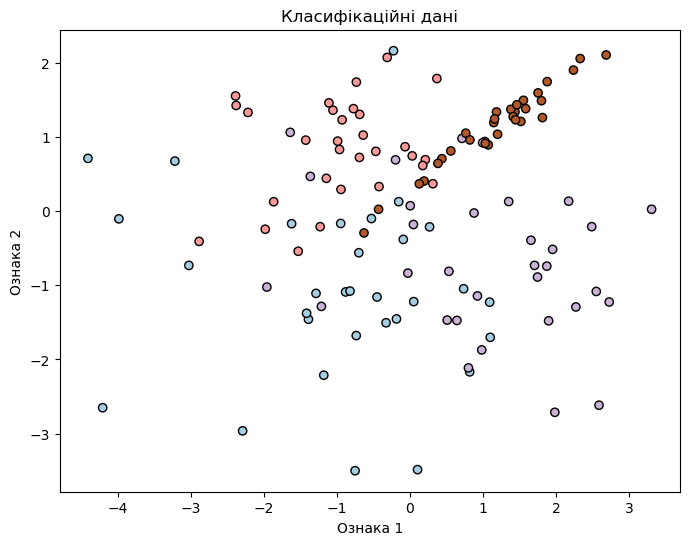

In [43]:
# Генерація даних для класифікації
x_class, y_class = datasets.make_classification(
    n_samples=124,        
    n_features=2,         
    n_informative=2,      
    n_redundant=0,        
    n_repeated=0,         
    n_classes=4,          
    n_clusters_per_class=1,  
    random_state=12       
)

# Візуалізація даних
plt.figure(figsize=(8, 6))
plt.scatter(x_class[:, 0], x_class[:, 1], c=y_class, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Класифікаційні дані")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.show()


In [45]:
# Розділення даних
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(
    x_class, y_class, test_size=0.2, random_state=17
)

In [47]:
# Навчання класифікаційної моделі
classifier = MLPClassifier(
    solver="sgd", activation="logistic", learning_rate_init=0.25, max_iter=350, random_state=17
)
classifier.fit(x_train_class, y_train_class)
y_pred_class = classifier.predict(x_test_class)


In [49]:
# Оцінка моделі класифікації
print("Класифікація:")
print("Точність на тренувальних даних:", classifier.score(x_train_class, y_train_class))
print("Точність на тестових даних:", classifier.score(x_test_class, y_test_class))
print("Матриця плутанини:\n", confusion_matrix(y_test_class, y_pred_class))
print("Classification report:\n", classification_report(y_test_class, y_pred_class))


Класифікація:
Точність на тренувальних даних: 0.797979797979798
Точність на тестових даних: 0.6
Матриця плутанини:
 [[2 0 1 1]
 [1 3 0 3]
 [1 1 6 2]
 [0 0 0 4]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.75      0.43      0.55         7
           2       0.86      0.60      0.71        10
           3       0.40      1.00      0.57         4

    accuracy                           0.60        25
   macro avg       0.63      0.63      0.58        25
weighted avg       0.70      0.60      0.61        25



In [51]:
# Генерація даних для регресії
x_regr, y_regr = datasets.make_regression(
    n_samples=124, n_features=5, n_targets=2, noise=1.0, random_state=12
)

In [53]:
# Розділення даних
x_train_regr, x_test_regr, y_train_regr, y_test_regr = train_test_split(
    x_regr, y_regr, test_size=0.2, random_state=17
)

In [55]:
# Навчання регресійної моделі
regressor = MLPRegressor(
    solver="sgd", activation="logistic", learning_rate_init=0.25, max_iter=350, random_state=17
)
regressor.fit(x_train_regr, y_train_regr)
y_pred_regr = regressor.predict(x_test_regr)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
# Оцінка моделі регресії
print("\nРегресія:")
print("R2 на тренувальних даних:", r2_score(y_train_regr, regressor.predict(x_train_regr)))
print("R2 на тестових даних:", r2_score(y_test_regr, y_pred_regr))
print("MAE:", mean_absolute_error(y_test_regr, y_pred_regr))
print("MSE:", mean_squared_error(y_test_regr, y_pred_regr))


Регресія:
R2 на тренувальних даних: 0.9320167358798508
R2 на тестових даних: 0.788318496947106
MAE: 38.34759219509542
MSE: 2763.7845380636313


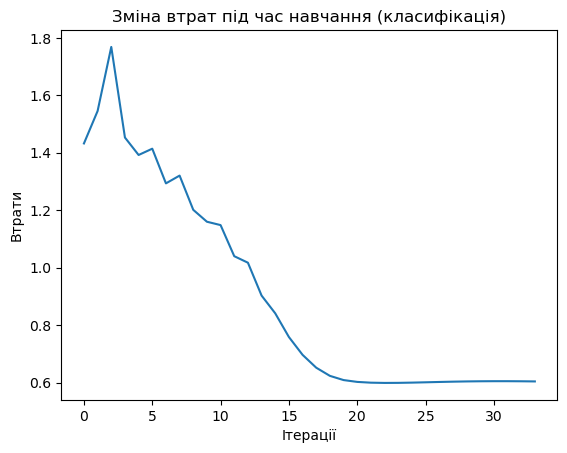

In [59]:
# Візуалізація втрат класифікаційної моделі
if hasattr(classifier, "loss_curve_"):
    plt.figure()
    plt.plot(classifier.loss_curve_)
    plt.title("Зміна втрат під час навчання (класифікація)")
    plt.xlabel("Ітерації")
    plt.ylabel("Втрати")
    plt.show()

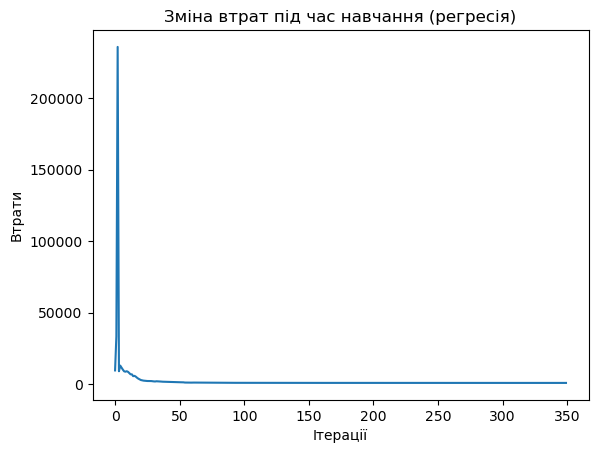

In [61]:
# Візуалізація втрат регресійної моделі
if hasattr(regressor, "loss_curve_"):
    plt.figure()
    plt.plot(regressor.loss_curve_)
    plt.title("Зміна втрат під час навчання (регресія)")
    plt.xlabel("Ітерації")
    plt.ylabel("Втрати")
    plt.show()